<a href="https://colab.research.google.com/github/madhav2381/Youtube-Comments-Spam-Classification/blob/main/Youtube_Comments_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import re
import string
import bs4
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import keras 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.normalization import batch_normalization
from keras.layers import Activation, Dense, Dropout
from keras.preprocessing import text, sequence
from keras.preprocessing.sequence import pad_sequences
from keras import utils

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
'''
!rm -rf '/content/YouTube-Spam-Collection-data/__MACOSX'
!rm -rf '/content/YouTube-Spam-Collection-data/Youtube01-Psy.csv'
!rm -rf '/content/YouTube-Spam-Collection-data/Youtube03-LMFAO.csv'
!rm -rf '/content/YouTube-Spam-Collection-data/Youtube04-Eminem.csv'
!rm -rf '/content/YouTube-Spam-Collection-data/Youtube05-Shakira.csv'
!rm -rf  '/content/YouTube-Spam-Collection-data/Youtube02-KatyPerry.csv'
!rm -rf '/content/YouTube-Spam-Collection-data'
'''

"\n!rm -rf '/content/YouTube-Spam-Collection-data/__MACOSX'\n!rm -rf '/content/YouTube-Spam-Collection-data/Youtube01-Psy.csv'\n!rm -rf '/content/YouTube-Spam-Collection-data/Youtube03-LMFAO.csv'\n!rm -rf '/content/YouTube-Spam-Collection-data/Youtube04-Eminem.csv'\n!rm -rf '/content/YouTube-Spam-Collection-data/Youtube05-Shakira.csv'\n!rm -rf  '/content/YouTube-Spam-Collection-data/Youtube02-KatyPerry.csv'\n!rm -rf '/content/YouTube-Spam-Collection-data'\n"

In [ ]:
os.mkdir('/content/YouTube-Spam-Collection-data')

In [ ]:
!unzip '/content/drive/MyDrive/YouTube-Spam-Collection-v1.zip' -d '/content/YouTube-Spam-Collection-data'

Archive:  /content/drive/MyDrive/YouTube-Spam-Collection-v1.zip
  inflating: /content/YouTube-Spam-Collection-data/Youtube01-Psy.csv  
   creating: /content/YouTube-Spam-Collection-data/__MACOSX/
  inflating: /content/YouTube-Spam-Collection-data/__MACOSX/._Youtube01-Psy.csv  
  inflating: /content/YouTube-Spam-Collection-data/Youtube02-KatyPerry.csv  
  inflating: /content/YouTube-Spam-Collection-data/__MACOSX/._Youtube02-KatyPerry.csv  
  inflating: /content/YouTube-Spam-Collection-data/Youtube03-LMFAO.csv  
  inflating: /content/YouTube-Spam-Collection-data/__MACOSX/._Youtube03-LMFAO.csv  
  inflating: /content/YouTube-Spam-Collection-data/Youtube04-Eminem.csv  
  inflating: /content/YouTube-Spam-Collection-data/__MACOSX/._Youtube04-Eminem.csv  
  inflating: /content/YouTube-Spam-Collection-data/Youtube05-Shakira.csv  
  inflating: /content/YouTube-Spam-Collection-data/__MACOSX/._Youtube05-Shakira.csv  


In [ ]:
data_directory = '/content/YouTube-Spam-Collection-data/'
data_files = sorted(os.listdir('/content/YouTube-Spam-Collection-data'))
data_files = [file for file in data_files if '.csv' in file]
train_data = []
for file in data_files:
    data = pd.read_csv(data_directory + file)
    train_data.append(data)
train_data = pd.concat(train_data)

In [ ]:
train_data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [ ]:
train_data.shape

(1956, 5)

In [ ]:
train_data.CLASS.value_counts()

1    1005
0     951
Name: CLASS, dtype: int64

In [ ]:
train_data.isnull().sum()

COMMENT_ID      0
AUTHOR          0
DATE          245
CONTENT         0
CLASS           0
dtype: int64

In [ ]:
train_data.CONTENT.to_list()

['Huh, anyway check out this you[tube] channel: kobyoshi02',
 "Hey guys check out my new channel and our first vid THIS IS US THE  MONKEYS!!! I'm the monkey in the white shirt,please leave a like comment  and please subscribe!!!!",
 'just for test I have to say murdev.com',
 'me shaking my sexy ass on my channel enjoy ^_^ \ufeff',
 'watch?v=vtaRGgvGtWQ   Check this out .\ufeff',
 'Hey, check out my new website!! This site is about kids stuff. kidsmediausa  . com',
 'Subscribe to my channel \ufeff',
 'i turned it on mute as soon is i came on i just wanted to check the  views...\ufeff',
 'You should check my channel for Funny VIDEOS!!\ufeff',
 'and u should.d check my channel and tell me what I should do next!\ufeff',
 'Hey subscribe to me\ufeff',
 " Once you have started reading do not stop. If you do not subscribe to me  within one day you and you're entire family will die so if you want to stay  alive subscribe right now.\ufeff",
 'https://twitter.com/GBphotographyGB\ufeff',
 'subscri

> Data has punctuations, Encoding characters, URL links, Contractions(don't, i'm ..), Extra spaces, Numeric digits and words containing digits.






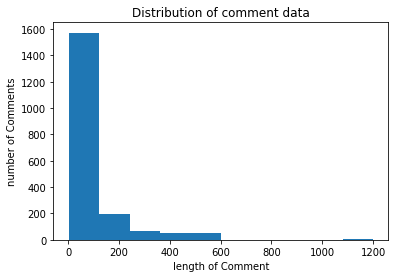

Average lenght of the data:- 94.70092024539878


In [ ]:
train_data['len'] = [len(x) for x in train_data.CONTENT]
plt.hist(train_data['len'])
plt.ylabel("number of Comments")
plt.xlabel("length of Comment")
plt.title("Distribution of comment data")
plt.show()
print("Average lenght of the data:-", train_data['len'].mean())

In [ ]:
train_data[train_data['CONTENT'].apply(lambda x : len(x)) > 95].CLASS.value_counts()

1    389
0    107
Name: CLASS, dtype: int64

In [ ]:
above_mean_data = train_data[train_data['CONTENT'].apply(lambda x : len(x)) > 95].CLASS.value_counts().to_dict()

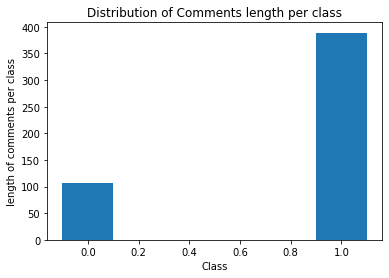

In [ ]:
plt.bar(above_mean_data.keys(), above_mean_data.values(), width=0.2)
plt.xlabel("Class")
plt.ylabel("length of comments per class")
plt.title("Distribution of Comments length per class");

In [ ]:
train_data.groupby(["CLASS"])["len"].mean()

CLASS
0     49.644585
1    137.336318
Name: len, dtype: float64



> Average lenght of comments is about 95 characters. About 78% of the data that has lenght more than 95 are spam. Average length of spam comments is more than non-spam comments.



In [ ]:
train_data['word_count'] = train_data['CONTENT'].apply(lambda x: len(str(x).split()))

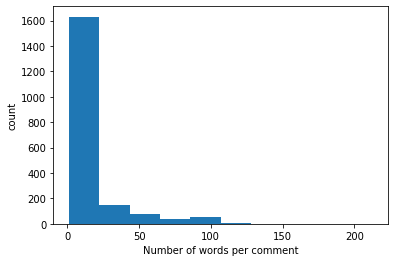

In [ ]:
plt.hist(train_data['word_count'])
plt.ylabel("count")
plt.xlabel("Number of words per comment")
plt.show()

In [ ]:
train_data['word_count'].mean()

15.581799591002046

In [ ]:
train_data.groupby(["CLASS"])["word_count"].mean()

CLASS
0     9.100946
1    21.714428
Name: word_count, dtype: float64

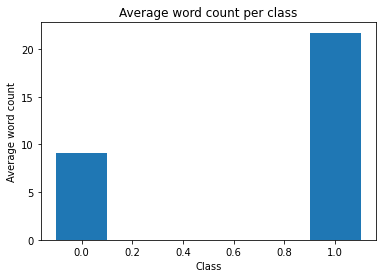

In [ ]:
AvgWordCount = train_data.groupby(["CLASS"])["word_count"].mean().to_dict()
plt.bar(AvgWordCount.keys(), AvgWordCount.values(), width=0.2)
plt.xlabel("Class")
plt.ylabel("Average word count")
plt.title("Average word count per class");



> Most of the comments have less than 50 words. Average number of words in the comments is about 16. The mean number of words of non-spam comments is lesser than mean number of words of spam comments.



# 1) Data Cleaning 

*    Drop unneccessary columns 
*    Expand contractions
*    Remove HTML tags 
*    Remove URLs
*    Convert text to lowercase
*    Remove numeric digits and words with digits
*    Remove punctuations
*    Remove encoding 
*    Remove Extra Spaces




**1.1) Drop unneccessary columns**

> We need CONTENT and CLASS columns to perform spam classification task. Remaining attributes in the dataset can be removed.


In [ ]:
train_data.drop(['COMMENT_ID','AUTHOR','DATE','len'] ,axis=1,inplace=True)
train_data.info()
train_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 0 to 369
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CONTENT     1956 non-null   object
 1   CLASS       1956 non-null   int64 
 2   word_count  1956 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


,CONTENT,CLASS,word_count
0,"Huh, anyway check out this you[tube] channel: ...",1,8
1,Hey guys check out my new channel and our firs...,1,30
2,just for test I have to say murdev.com,1,8
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,11
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1,5


**1.2) Expand contractions**



> For better analysis of text data we need to expand contractions **I'm for I am , does'nt for does not etc..**





In [ ]:
#Contractions Dictionary
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the CONTENT feature
train_data['CONTENT']=train_data['CONTENT'].apply(lambda x:expand_contractions(x))

In [ ]:
# check if still there are any contractions
for text in train_data.CONTENT.to_list():
    r = contractions_re.findall(text)
print(r)

[]


**1.3) Remove Html tags**


In [ ]:
train_data['CONTENT']=train_data['CONTENT'].apply(lambda x: bs4.BeautifulSoup(x, 'lxml').get_text());

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "https://twitter.com/GBphotographyGB﻿" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "http://ubuntuone.com/40beUutVu2ZKxK4uTgPZ8K﻿" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "http://hackfbaccountlive.com/?ref=4604617﻿" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that documen

**1.4) Remove URLs**

> Replace url to http



In [ ]:
def replace_url(text, replacement):
    text = str(text)
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', replacement, text)
    text = re.sub('[/]?watch(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', replacement, text)
    text = re.sub(r'[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)', replacement , text, flags=re.MULTILINE)
    
    return text

# Replace url to http
train_data['CONTENT'] = train_data['CONTENT'].apply(lambda x: replace_url(x, ' '))

**1.5) Convert text to lowercase**



In [ ]:
train_data['CONTENT'] = train_data['CONTENT'].apply(lambda x: x.lower())

**1.6) Remove numeric digits and words with digits**

In [ ]:
train_data['CONTENT'] = train_data['CONTENT'].apply(lambda x: re.sub('\w*\d\w*','', x))

**1.7) Remove punctuations**

> For text data analysis punctuations are not needed



In [ ]:
train_data['CONTENT'] = train_data['CONTENT'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

**1.8) Remove encoding**

> Some comments have encoding \ufefff and \xao and emojis. *italicized text*



In [ ]:
def remove_non_ascii(text): 
    return ''.join(i for i in text if ord(i)<128) 

train_data['CONTENT'] = train_data['CONTENT'].apply(lambda x: remove_non_ascii(x)) 

**1.9) Remove Extra Spaces**

In [ ]:
train_data['CONTENT'] = train_data.CONTENT.replace('\s+', ' ', regex=True)
train_data['CONTENT'] = train_data.CONTENT.apply(lambda x: x.strip()) 



---



**Data after cleaning**

In [ ]:
train_data.CONTENT.to_list()

['huh anyway check out this youtube channel',
 'hey guys check out my new channel and our first vid this is us the monkeys i am the monkey in the white shirtplease leave a like comment and please subscribe',
 'just for test i have to say',
 'me shaking my sexy ass on my channel enjoy',
 'check this out',
 'hey check out my new website this site is about kids stuff kidsmediausa com',
 'subscribe to my channel',
 'i turned it on mute as soon is i came on i just wanted to check the views',
 'you should check my channel for funny videos',
 'and u shouldd check my channel and tell me what i should do next',
 'hey subscribe to me',
 'once you have started reading do not stop if you do not subscribe to me within one day you and you are entire family will die so if you want to stay alive subscribe right now',
 '',
 'subscribe like comment',
 'please like d',
 'hello do you like gaming art videos scientific experiments tutorials lyrics videos and much much more of that if you do please check ou

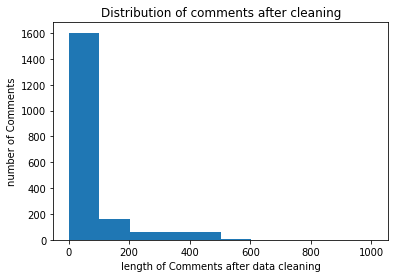

Average lenght of comments after cleaning:- 74.8762781186094


In [ ]:
data_len = [len(x) for x in train_data.CONTENT]
plt.hist(data_len)
plt.ylabel("number of Comments")
plt.xlabel("length of Comments after data cleaning")
plt.title("Distribution of comments after cleaning")
plt.show()
print("Average lenght of comments after cleaning:-",np.mean(data_len))

In [ ]:
train_data[train_data['CONTENT'].apply(lambda x : len(x)) > 77].CLASS.value_counts()

1    331
0    121
Name: CLASS, dtype: int64



> Average lenght of comments after cleaning the data is about 77. Almost 73% of data which has length more than 77 are spam.



# 2) Feature Extraction

*   Tokenization
*   Remove Stop Words
*   Lemmatization



**2.1)  Tokenization**

In [ ]:
#Tokenize the data
train_data['CLEAN_CONTENT'] = train_data['CONTENT'].apply(lambda x: x.split())
#word_count = [len(str(x).split()) for x  in train_data['CONTENT'] ]

In [ ]:
train_data['CLEAN_CONTENT']

0      [huh, anyway, check, out, this, youtube, channel]
1      [hey, guys, check, out, my, new, channel, and,...
2                    [just, for, test, i, have, to, say]
3      [me, shaking, my, sexy, ass, on, my, channel, ...
4                                     [check, this, out]
                             ...                        
365    [i, love, this, song, because, we, sing, it, a...
366    [i, love, this, song, for, two, reasons, it, i...
367                                                [wow]
368                        [shakira, u, are, so, wiredo]
369                     [shakira, is, the, best, dancer]
Name: CLEAN_CONTENT, Length: 1956, dtype: object

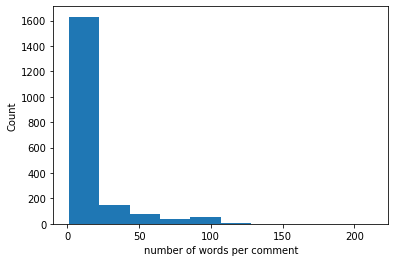

In [ ]:
plt.hist(train_data['word_count'])
plt.xlabel("number of words per comment")
plt.ylabel("Count")
plt.show()

In [ ]:
np.mean(train_data['word_count'])

15.581799591002046

> After cleaning the data, Most of the comments have less than 50 words. Average number of words in the comments is about 15.



**2.2) Remove Stop Words**

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = dict(sorted(words_freq, key = lambda x: x[1], reverse=True))
    return dict(list(words_freq.items())[:n])

In [ ]:
# Top 20 common words/ Stop words
common_words = get_top_n_words(train_data['CONTENT'], 20)

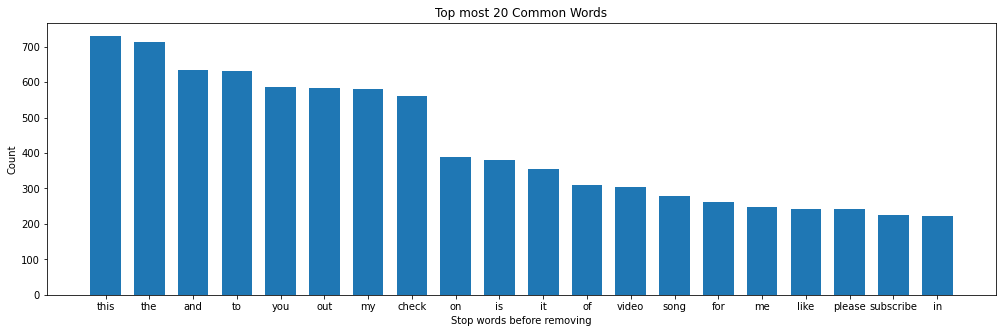

In [ ]:
plt.figure(figsize = (17,5))
plt.bar(common_words.keys(), common_words.values(), width= 0.7)
plt.xlabel("Stop words before removing")
plt.ylabel("Count")
plt.title("Top most 20 Common Words");

In [ ]:
# Remove STOPWORDS

nltk.download('stopwords')
stop = stopwords.words('english')

train_data['CLEAN_CONTENT'] = train_data['CLEAN_CONTENT'].apply(lambda x: [word for word in x if word not in (stop)])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


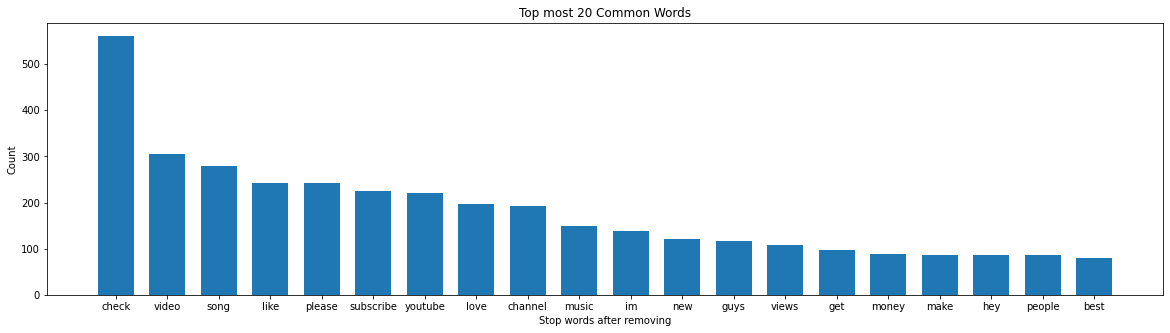

In [ ]:
# After removing STOPWORDS

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items() if word not in stop]
    words_freq = dict(sorted(words_freq, key = lambda x: x[1], reverse=True))
    return dict(list(words_freq.items())[:n])

# Top 20 common words/ Stop words
common_words = get_top_n_words(train_data['CONTENT'], 20)

plt.figure(figsize = (20,5))
plt.bar(common_words.keys(), common_words.values(), width= 0.7)
plt.xlabel("Stop words after removing")
plt.ylabel("Count")
plt.title("Top most 20 Common Words");

**2.3 Lemmatization**

In [ ]:
#normalization - lemmatizing

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
lemmatize_function = lambda x: ' '.join([lemmatizer.lemmatize(str(word)) for word in x])
train_data['CLEAN_CONTENT'] = train_data['CLEAN_CONTENT'].apply(lemmatize_function)
#train_data['Cleaned text'] = train_data['tweet_without_stopwords'].apply(lambda tweet : ' '.join(tweet))
train_data['CLEAN_CONTENT'].head().to_list()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


['huh anyway check youtube channel',
 'hey guy check new channel first vid u monkey monkey white shirtplease leave like comment please subscribe',
 'test say',
 'shaking sexy as channel enjoy',
 'check']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(train_data['CLEAN_CONTENT'], train_data['CLASS'], test_size=0.2)

In [ ]:
Accuracy = []

In [ ]:
# Logistic Regression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5, max_iter = 200)),
               ]);
logreg.fit(X_train, Y_train)

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, Y_test))
Accuracy.append(accuracy_score(y_pred, Y_test))
print(classification_report(Y_test, y_pred))
print(precision_score(y_pred, Y_test))g
print(recall_score(y_pred, Y_test))

accuracy 0.8239795918367347
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       201
           1       0.77      0.91      0.83       191

    accuracy                           0.82       392
   macro avg       0.83      0.83      0.82       392
weighted avg       0.84      0.82      0.82       392

0.9109947643979057
0.7699115044247787


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# Naive Baye's 

from sklearn.naive_bayes import MultinomialNB
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, Y_train)
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, Y_test))
Accuracy.append(accuracy_score(y_pred, Y_test))
print(classification_report(Y_test, y_pred))
print(precision_score(y_pred, Y_test))
print(recall_score(y_pred, Y_test))

accuracy 0.8316326530612245
              precision    recall  f1-score   support

           0       0.90      0.75      0.82       201
           1       0.78      0.92      0.84       191

    accuracy                           0.83       392
   macro avg       0.84      0.83      0.83       392
weighted avg       0.84      0.83      0.83       392

0.9162303664921466
0.7777777777777778


In [ ]:
# Linear Support vector Machine

from sklearn.svm import SVC

clf = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', SVC()),
              ])
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, Y_test))
Accuracy.append(accuracy_score(y_pred, Y_test))
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
print(precision_score(y_pred, Y_test))
print(recall_score(y_pred, Y_test))

accuracy 0.9030612244897959
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       201
           1       0.90      0.91      0.90       191

    accuracy                           0.90       392
   macro avg       0.90      0.90      0.90       392
weighted avg       0.90      0.90      0.90       392

[[181  20]
 [ 18 173]]
0.9057591623036649
0.8963730569948186


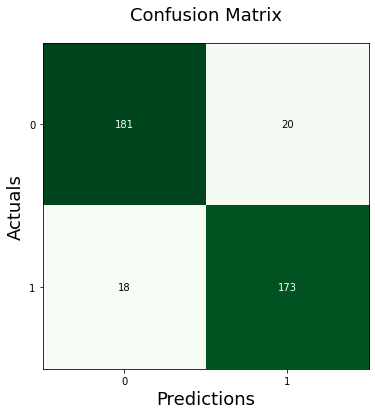

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
c = confusion_matrix(Y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=c, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier

RFC = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', RandomForestClassifier()),
              ])

RFC.fit(X_train, Y_train)
y_pred = RFC.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, Y_test))
Accuracy.append(accuracy_score(y_pred, Y_test))
print(classification_report(Y_test, y_pred))
print(confusion_matrix(y_pred, Y_test))
print(precision_score(y_pred, Y_test))
print(recall_score(y_pred, Y_test))

accuracy 0.8520408163265306
              precision    recall  f1-score   support

           0       0.92      0.78      0.84       201
           1       0.80      0.93      0.86       191

    accuracy                           0.85       392
   macro avg       0.86      0.85      0.85       392
weighted avg       0.86      0.85      0.85       392

[[156  13]
 [ 45 178]]
0.9319371727748691
0.7982062780269058


In [ ]:
# unique words in the data
li = []
for l in train_data['CLEAN_CONTENT'].apply(lambda x: x.split(' ')).to_list():
    li = li + l
len(set(li))

3318

In [ ]:
from keras.preprocessing.text import Tokenizer
max_words = 3000
max_len = 200
tokenize = Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(X_train) 
sequences = tokenize.texts_to_sequences(X_train)
data = pad_sequences(sequences, maxlen=max_len)

In [ ]:
tokenize.fit_on_texts(X_test) 
sequences = tokenize.texts_to_sequences(X_test)
X_test = pad_sequences(sequences, maxlen=max_len)

In [ ]:
# Build the ANN model.

batch_size = 32
max_len = 200
model = Sequential()
model.add(Dense(512, input_shape=(max_len,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
history = model.fit(data, Y_train,
                    batch_size=batch_size,
                    epochs=100,
                    verbose=1)

In [ ]:
score = model.evaluate(X_test, Y_test,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

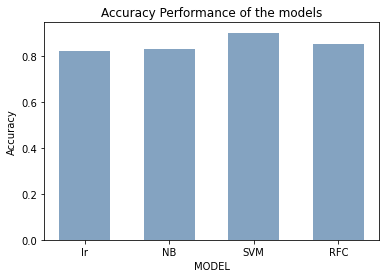

In [ ]:
import matplotlib.pyplot as plt
models = ['lr', 'NB', 'SVM', 'RFC']
plt.bar(models, Accuracy, color=(0.2, 0.4, 0.6, 0.6), width = 0.6)
plt.xlabel("MODEL")
plt.ylabel("Accuracy")
plt.title("Accuracy Performance of the models")
plt.show()